In [1]:
# 데이터 확인
import pandas as pd

data = pd.read_csv("PatientInfo.csv")

In [2]:
data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
# 필요한 칼럼만 확인 
new_data = data[['province','confirmed_date']]

In [4]:
new_data.head()

,province,confirmed_date
0,서울,2020-01-23
1,서울,2020-01-30
2,서울,2020-01-30
3,서울,2020-01-30
4,서울,2020-01-31


In [5]:
# province에 어떤 지역이 있는지 확인 
new_data['province'].value_counts()

서울      1312
경상북도    1254
경기도     1208
인천       343
충청남도     168
부산       151
대구       137
경상남도     133
대전       119
강원도       63
충청북도      56
울산        55
세종        51
광주        44
전라북도      27
전라남도      25
제주도       19
Name: province, dtype: int64

In [6]:
# 각 지역별로 csv 분리 
su = new_data[new_data['province'] == "서울"]
kb = new_data[new_data['province'] == "경상북도"]
kk = new_data[new_data['province'] == "경기도"]
ic = new_data[new_data['province'] == "인천"]
cn = new_data[new_data['province'] == "충청남도"]
bs = new_data[new_data['province'] == "부산"]
dg = new_data[new_data['province'] == "대구"]
kn = new_data[new_data['province'] == "경상남도"]
dj = new_data[new_data['province'] == "대전"]
kw = new_data[new_data['province'] == "강원도"]
cc = new_data[new_data['province'] == "충청북도"]
us = new_data[new_data['province'] == "울산"]
sj = new_data[new_data['province'] == "세종"]
kj = new_data[new_data['province'] == "광주"]
jb = new_data[new_data['province'] == "전라북도"]
jn = new_data[new_data['province'] == "전라남도"]
jeju = new_data[new_data['province'] == "제주도"]

In [7]:
# 7,8,9월 데이터 취합 후 원래 csv에 더해서 저장 


In [8]:
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import plotly.graph_objs as go 
import plotly.offline as py 
import plotly.express as px
import plotly.io as pio

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
su.head()

,province,confirmed_date
0,서울,2020-01-23
1,서울,2020-01-30
2,서울,2020-01-30
3,서울,2020-01-30
4,서울,2020-01-31


In [10]:
# 서울 지역 날짜별 확진자 확인 
su.groupby('confirmed_date').count()

,province
confirmed_date,
2020-01-23,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2020-06-25,17
2020-06-26,17
2020-06-27,14


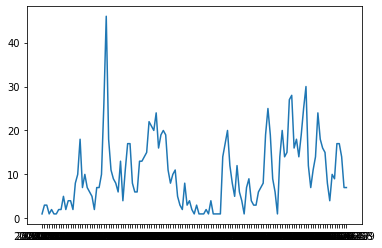

In [11]:
plt.plot(su.groupby('confirmed_date').count()) # 서울 지역 확진자 날짜별 확인 

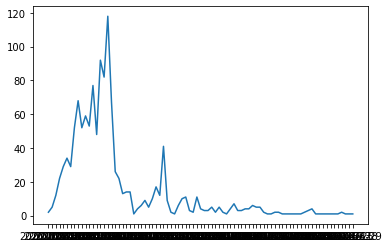

In [12]:
plt.plot(kb.groupby('confirmed_date').count()) # 경상북도 지역 확진자 날짜별 확인 

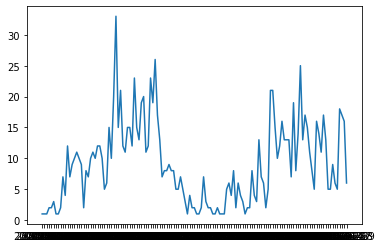

In [13]:
plt.plot(kk.groupby('confirmed_date').count()) # 경기도 지역 확진자 날짜별 확인 

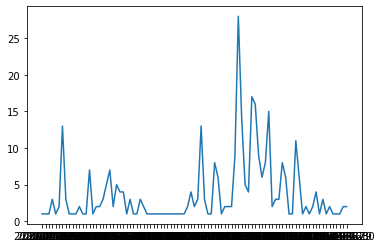

In [14]:
plt.plot(ic.groupby('confirmed_date').count()) # 인천 지역 확진자 날짜별 확인 

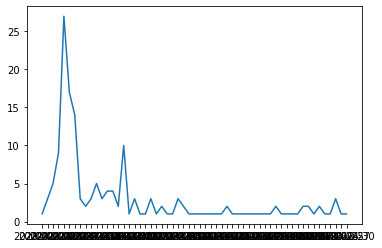

In [15]:
plt.plot(cn.groupby('confirmed_date').count()) # 충청남도 지역 확진자 날짜별 확인 

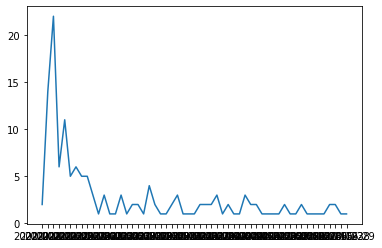

In [16]:
plt.plot(bs.groupby('confirmed_date').count()) # 부산 지역 확진자 날짜별 확인 

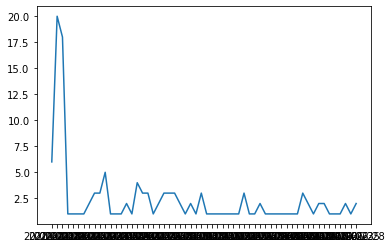

In [17]:
plt.plot(dg.groupby('confirmed_date').count()) # 대구 지역 확진자 날짜별 확인 

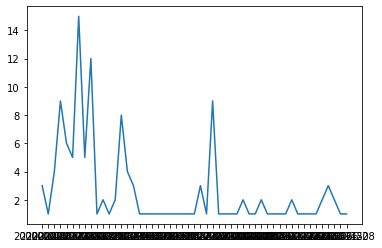

In [18]:
plt.plot(kn.groupby('confirmed_date').count()) # 경상남도 지역 확진자 날짜별 확인 

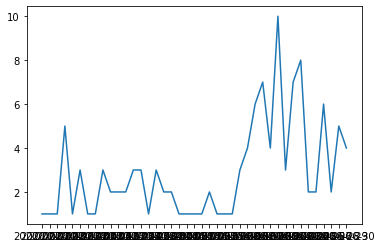

In [19]:
plt.plot(dj.groupby('confirmed_date').count()) # 대전 지역 확진자 날짜별 확인 

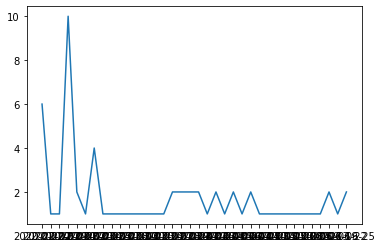

In [20]:
plt.plot(kw.groupby('confirmed_date').count()) # 강원도 지역 확진자 날짜별 확인 

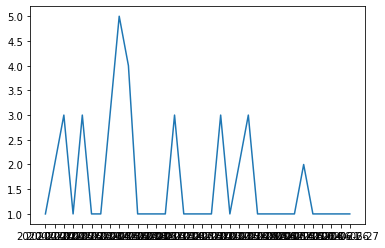

In [21]:
plt.plot(cc.groupby('confirmed_date').count()) # 충청북도 지역 확진자 날짜별 확인 

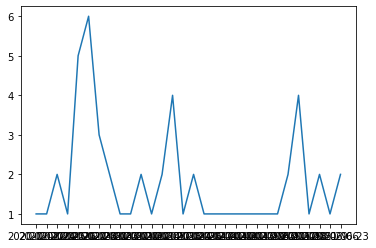

In [22]:
plt.plot(us.groupby('confirmed_date').count()) # 울산 지역 확진자 날짜별 확인 

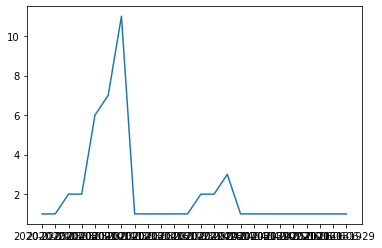

In [23]:
plt.plot(sj.groupby('confirmed_date').count()) # 세종 지역 확진자 날짜별 확인 

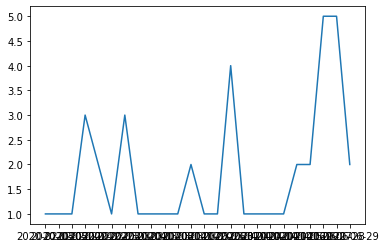

In [24]:
plt.plot(kj.groupby('confirmed_date').count()) # 광주 지역 확진자 날짜별 확인 

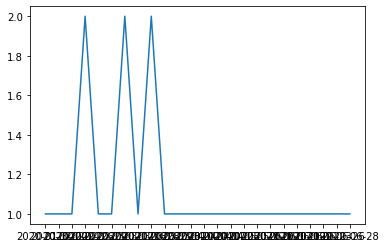

In [25]:
plt.plot(jb.groupby('confirmed_date').count()) # 전라북도 지역 확진자 날짜별 확인 

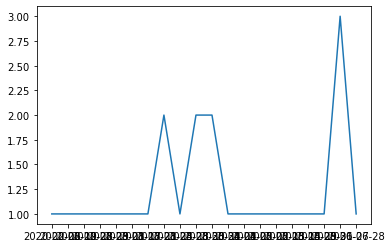

In [26]:
plt.plot(jn.groupby('confirmed_date').count()) # 전라남도 지역 확진자 날짜별 확인 

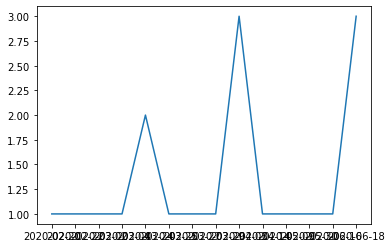

In [27]:
plt.plot(jeju.groupby('confirmed_date').count()) # 제주도 지역 확진자 날짜별 확인 

# ARIMA

In [28]:
# 예측 알고리즘 사용하여 시각화 
## 1. ARIMA
import pandas as pd
import numpy as np 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

def forecast_line(df,column):
    model=auto_arima(df[column],suppress_warnings=True)
    p,d,q = model.order
    
    if model.order == (0,0,0):
        p = 1
    elif p*q != 0:# AR 모형(회귀선 도출) 주로 활용
        q = 0
    else:
        pass
    
    n=int(df.shape[0]*0.8)
    train=df[:n]
    test=df[n:]
    model=ARIMA(train[column], order=(p,d,q)).fit()

    fc,se,conf=model.forecast(steps=len(test))
    fc_series=pd.Series(fc, index=test.index)    

    lower=pd.Series(conf[:,0], index=test.index) #하한값
    upper=pd.Series(conf[:,1], index=test.index) #상한값
    plt.figure(figsize=(12,5),dpi=100)
    plt.plot(df[column], label='Actuals') #실제값
    plt.plot(fc_series, label='Forecast') #예측값
    
    # 예측값의 구간
    plt.fill_between(lower.index, lower, upper, alpha=0.15)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

In [ ]:
forecast_line(su.groupby('confirmed_date').count(),'province') # 서울지역 확진자 예측 시각화 

In [ ]:
# 자기회귀누적이동평균모형(ARIMA(p,d,q) 모형)
model=auto_arima(su.groupby('confirmed_date').count(),suppress_warnings=True)
model
# 최적값 4,0,1 ARMA(p,q)모형 정상성을 만족

In [ ]:
#학습용,검증용 구분
n=int(su.shape[0]*.8)
train=su[:n]
test=su[n:]

In [ ]:
train.head()

In [ ]:
model=ARIMA(train.groupby('confirmed_date').count(), order=(4,0,1)).fit()

In [ ]:
model.plot_predict()
plt.show()

## FBP

In [29]:
su_new = su.groupby('confirmed_date').count()

In [40]:
# 필요한 데이터 구성 
# 날짜와, 일일 확진자 수 / 칼럼을 ds,y 지정
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [57]:
su_new.to_csv("su_new.csv", index= True) # 데이터 가공 

In [54]:
su_new_data = pd.read_csv('su_new.csv')

In [58]:
su_new_data.head()

,confirmed_date,province
0,2020-01-23,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2


In [59]:
# FBP 모델에 넣기 위한 데이터 가공
su_new_data.columns = ['ds','y']

In [61]:
#Prophet 라이브러리를 사용한 예측
#유연성, 변형성 =0

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import logging

m=Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive'
)
m.fit(su_new_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [62]:
# 예측할 미래 dataframe 만들기 
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [63]:
# 예측값 yhat 0 이하 인덱스 0으로 변경
idx=forecast[forecast['yhat_upper']<0].index
forecast.loc[idx, 'yhat_upper']=0
forecast1=forecast

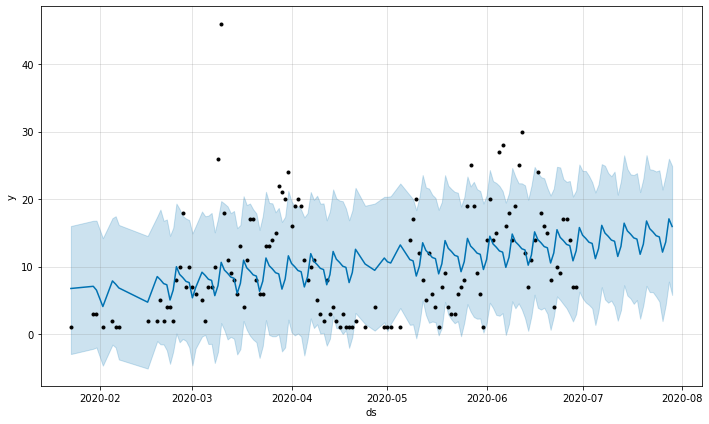

In [64]:
# 파란색 실선: 코로나 예상 환자
# 검은색 점 : 실제 환자
m.plot(forecast1);

검은색 점들이 이달의 환자들을 나타내고 파랑색 석은 그 추세를 보여준다. prophet를 통해 확인해보면 오차범위가 생각보다 크다는 것을 알 수가 있다. 

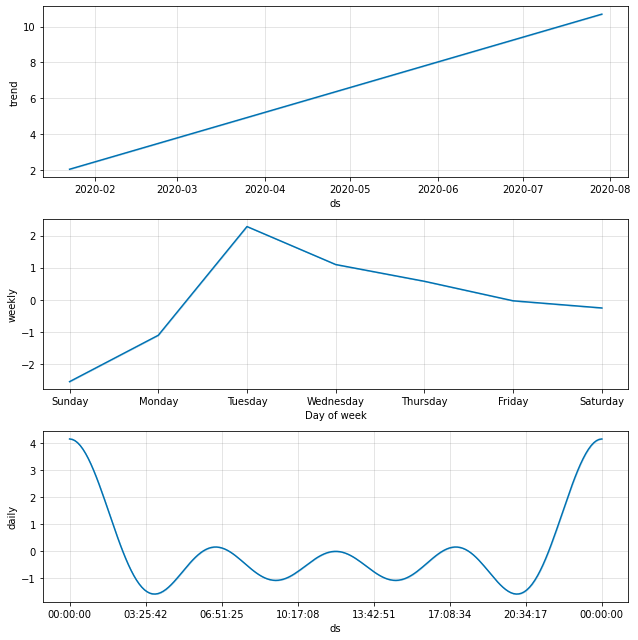

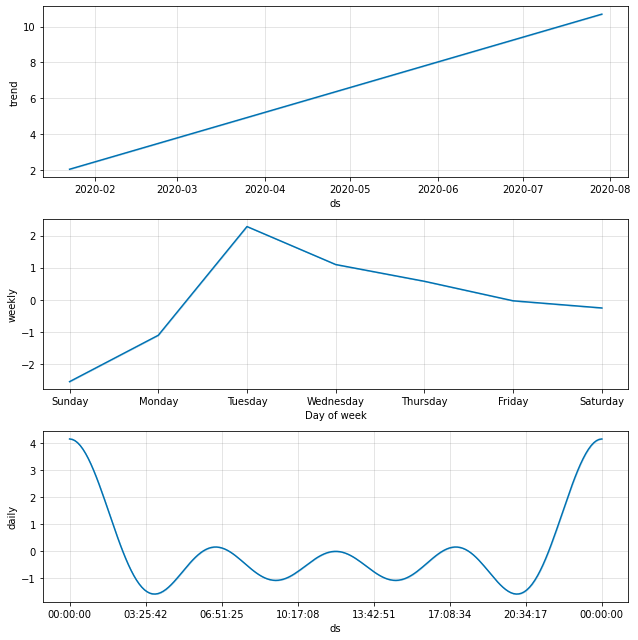

In [65]:
#forecast component를 시각화해준다(Trend, Weakly, Yearly)
#trend는 경향성을 보여주고 weekly는 한 주의 일별 경향을 보여준다
m.plot_components(forecast1)

In [68]:
#Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측해준다.
m = Prophet(
    changepoint_prior_scale=0.24, #Change Point의 유연성을 조정하는 방법: 디폴트는 0.05(값이 커질수록 유연해진다)
    changepoint_range=0.9, # 변환점 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정해주지만 90%로 설정해준다.
#     yearly_seasonality=False,
#     weekly_seasonality=False,
#     daily_seasonality=True,
#     seasonality_mode='additive'
)
m.fit(su_new_data)

changepoint_prior_scale, changepoint_range 유연성과 변환점 값을 임의로 설정하여 넣고 미래 시계열 데이터를 확인한다. 

In [69]:
#미래 dataframe
future = m.make_future_dataframe(periods=30) #현재까지의 날짜로부터 30일의 미래
forecast2 = m.predict(future)

In [70]:
# 시각화 
## 점이 없이 선만 있는 부분이 예측된 미래
fig = plot_plotly(m, forecast2)
py.iplot(fig)

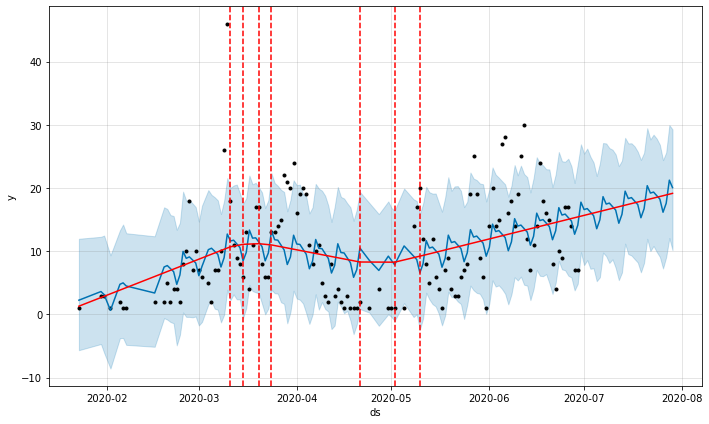

In [71]:
#checkpoints 나타내기
fig = m.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m, forecast2)
#빨간 점선이 changepoints, 빨간 실선이 Trend를 나타낸다

changepoint_prior_scale를 0.05(default)가 아닌 0.24로 설정한 것은 데이터가 짧은 기간동안의 데이터이며 local mean을 보이지 않는 비정상 모형이기 때문에 예측에 유연성을 증가

changepoint_range를 0.8(default)이 아닌 0.9로 한 것은 데이터의 수가 적기때문에 데이터 하나의 값에 영향을 크게 받을 것이라고 판단해 더 많은 범위의 데이터를 회귀모형을 만드는 데이터셋에 넣고자 함

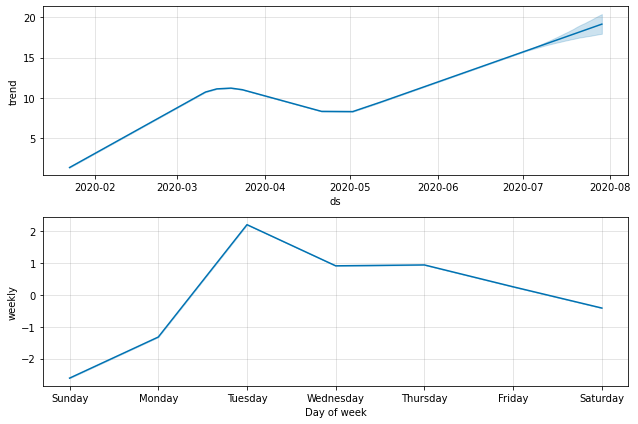

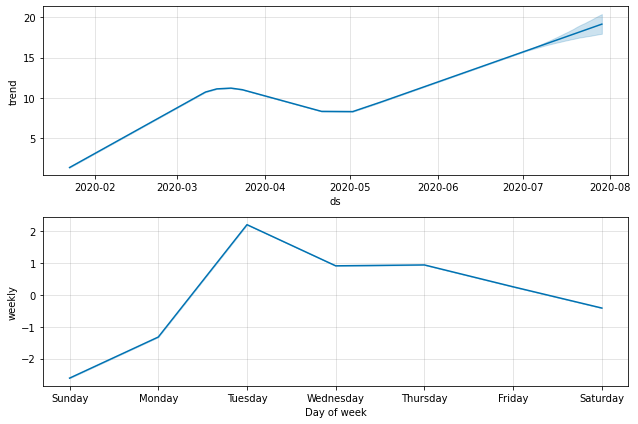

In [72]:
# 회귀 모형으로 확인 
m.plot_components(forecast2)

In [73]:
forecast2.date = pd.to_datetime(forecast2.ds)
#forecast1 대신 forecast2 사용
forecast2=forecast2.loc[:,['ds','yhat']]
forecast2=forecast2.set_index('ds')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



## RNN으로 예측


In [81]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

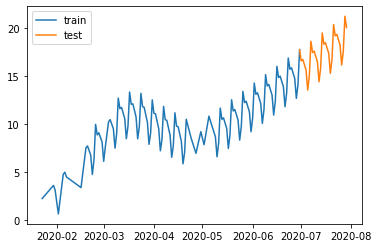

In [74]:
#자료를 섞지 않고 특정 시점을 기준으로 학습용,검증용을 구분
split_data=pd.Timestamp('06-30-2020')
train=forecast2.loc[:split_data, ['yhat']] #학습용 
test=forecast2.loc[split_data:, ['yhat']] #검증용
ax=plt.plot(train)
plt.plot(test)
plt.legend(['train','test'])

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(train)
train_sc=sc.transform(train)
test_sc=sc.transform(test)
#넘파이배열을 데이터프레임으로 변환
train_sc_df=pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df=pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)

In [76]:
# 훈련, 테스트 데이터로 구분
for s in range(1,11):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [77]:
#결측값 제거
X_train=train_sc_df.dropna().drop('Scaled',axis=1)
y_train=train_sc_df.dropna()[['Scaled']]
X_test=test_sc_df.dropna().drop('Scaled',axis=1)
y_test=test_sc_df.dropna()[['Scaled']]

In [78]:
#넘파이배열로 저장
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [79]:
#keras 신경망에 입력하기 위하여 3차원으로 변경
#  샘플수, timestep
X_train_t=X_train.reshape(X_train.shape[0],10,1)
X_test_t=X_test.reshape(X_test.shape[0],10,1)

In [82]:
model=Sequential()
# 순환계층, 출력노드 20개, timestep 12
model.add(LSTM(50, input_shape=(12,1)))
model.add(Dense(1))  #출력층, 활성화함수는 linear
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train_t, y_train, epochs=200, batch_size=30)

Epoch 1/200


4/4 [==============================] - 0s 3ms/step - loss: 0.2246
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 13/200
4/4 [==============================] - 0s 3ms/step - loss: 0

In [83]:
## 모델 훈련 
y_pred=model.predict(X_test_t)

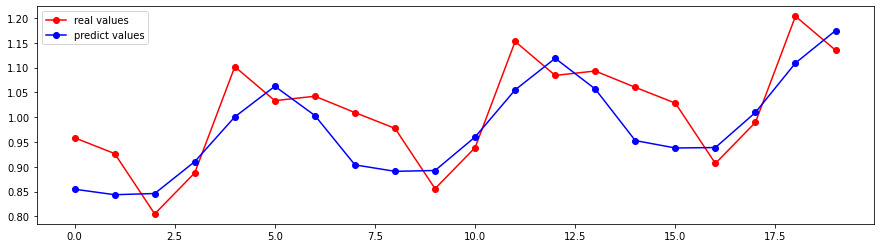

In [84]:
%matplotlib inline
fig=plt.figure(figsize=(15,4))
plt.plot(y_test.flatten(), 'ro-', label='real values')
plt.plot(y_pred.flatten(), 'bo-', label='predict values')
plt.legend()